# Subclustering of Post. Midgut/ Hindgut/ Ecto. PS14 in NK-data

In [1]:
#loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = '../../data/seurat_object/NK-data/seu_HQC_NK.obj')
seu_HQC

An object of class Seurat 
24184 features across 1592 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


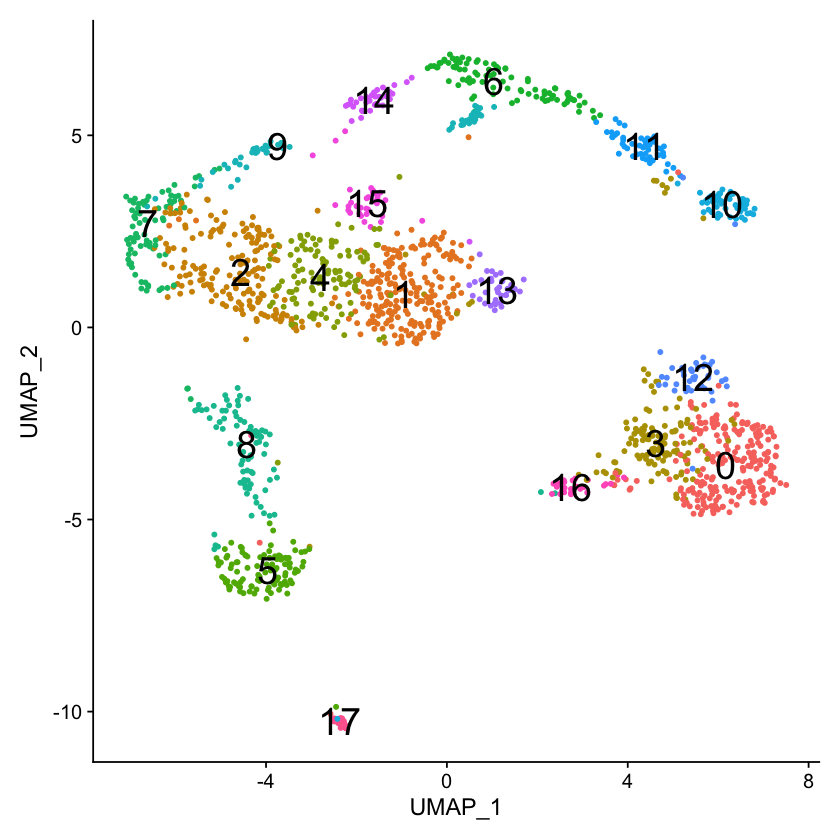

In [3]:
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## Picking up target clusters

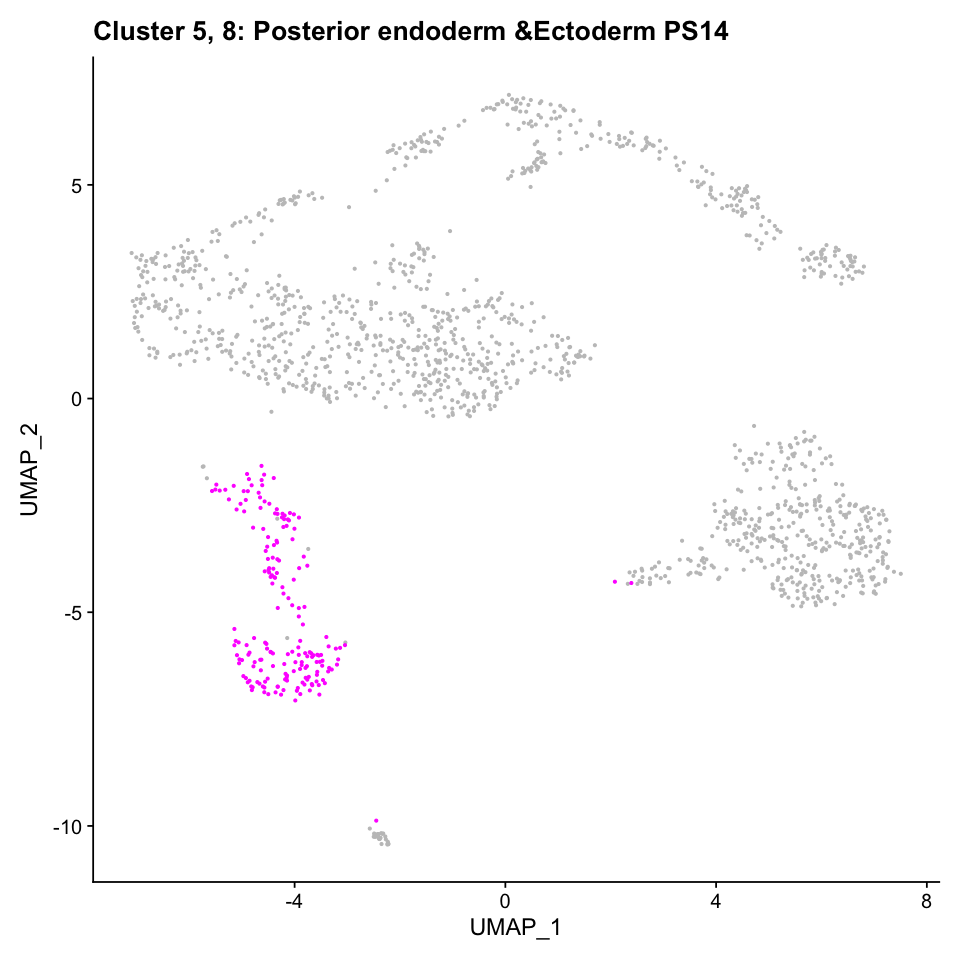

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(5, 8))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend()+ ggtitle('Cluster 5, 8: Posterior endoderm &Ectoderm PS14')

In [5]:
seu.post <- subset(seu_HQC, ident = c(5, 8))
seu.post

An object of class Seurat 
24184 features across 185 samples within 2 assays 
Active assay: SCT (10063 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

## Clustering
Num of cells < 500  
Skipping re-normalize

PC_ 1 
Positive:  Ilp4, CG5059, Ama, SoxN, hth, trn, CG15628, Ppa, dan, slp1 
	   ftz, tsh, ImpL2, Nrt, HnRNP-K, twi, ths, Antp, sca, h 
	   Imp-CR45204, wech, VepD, fz2, E2f1, lncRNA:bxd, HmgZ, CG6398, net, opa 
Negative:  fkh, ps, Pepck1, CG2930, Gmap, hkb, phu, aay, Oatp74D, DNaseII 
	   ImpE2, mnd, srp, Fas2, exex, smal, Ptx1, Lapsyn, CG32053, CG15236 
	   Pdp1, peb, apt, pgc, lncRNA:CR43126, bbg, Myc, CG18754, CG3940, rib 
PC_ 2 
Positive:  salm, disco, byn, ken, Blimp-1, dpn, Lac, CG13427, Ptr, rib 
	   klg, Abd-B, CG42762, hb, cad, Atx-1, D, apt, ftz, CG43394 
	   CG31871, emc, veil, Ppa, lncRNA:CR44317, Scp2, rau, trn, CG34383, CG8312 
Negative:  Ilp4, hll, CG34224, Nplp2, ImpE2, hkb, twi, CG3036, CG14688, VepD 
	   sna, CG16758, Cyp310a1, Mes2, CG32053, exex, CG12177, DNaseII, srp, pgc 
	   ltl, lncRNA:bxd, slp1, smal, zfh1, GstD5, tsh, HmgZ, CadN, be 
PC_ 3 
Positive:  rau, egr, tup, peb, kek1, Doc2, Doc1, Doc3, CG43184, sas 
	   Lapsyn, tll, Scp2, CG13653, mspo, cv-2, Atx-1,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 185
Number of edges: 7447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5367
Number of communities: 2
Elapsed time: 0 seconds


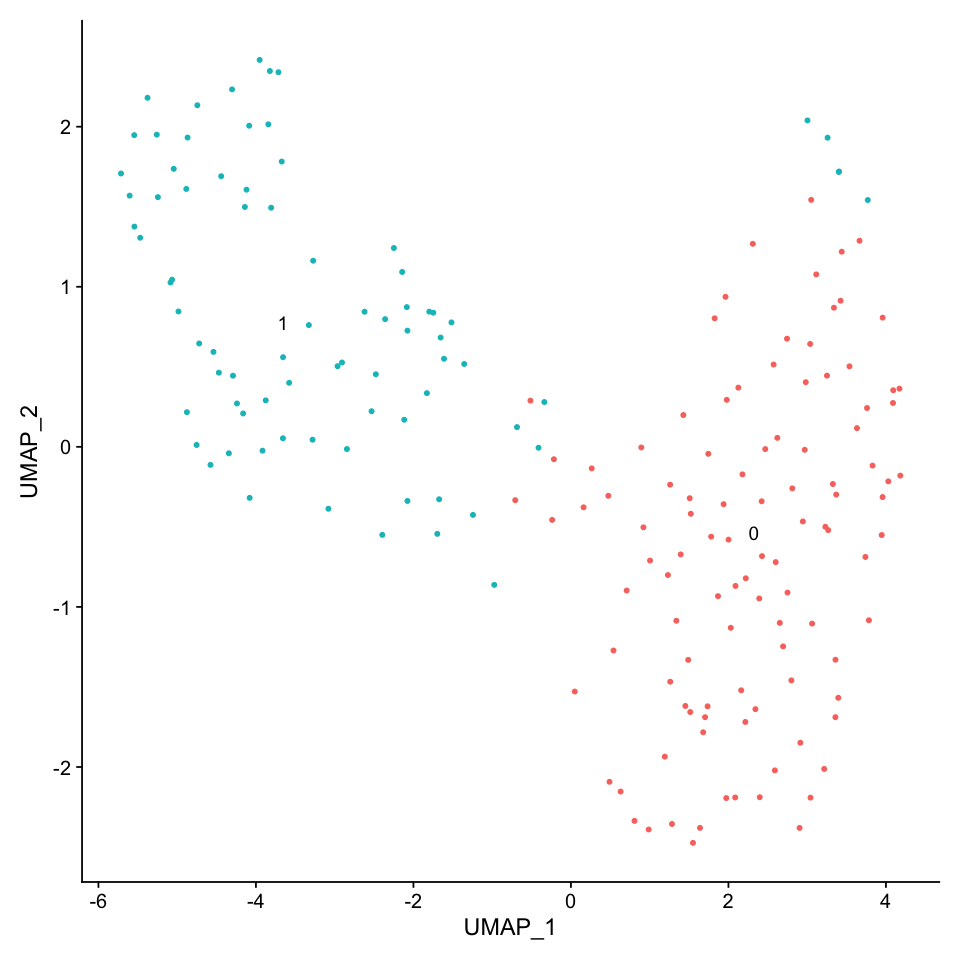

In [6]:
options(repr.plot.width=8, repr.plot.height=8)
seu.post <- RunPCA(seu.post)
seu.post <- RunUMAP(seu.post, dims = 1:30)
seu.post <- FindNeighbors(seu.post, dims = 1:30)
seu.post <- FindClusters(seu.post)
DimPlot(seu.post, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 185
Number of edges: 7447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2813
Number of communities: 5
Elapsed time: 0 seconds


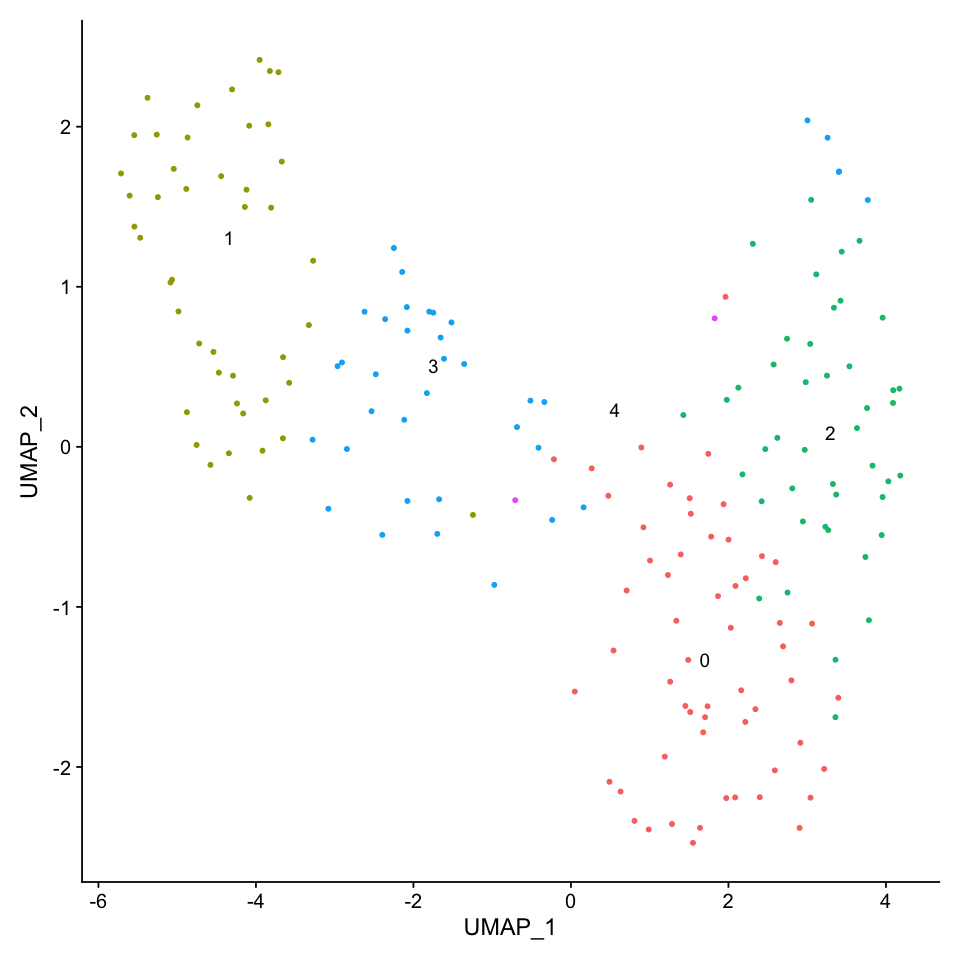

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
seu.post <- FindClusters(seu.post, resolution = 1.5)
DimPlot(seu.post, reduction = 'umap', label = T) + NoLegend()

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 185
Number of edges: 7447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.3595
Number of communities: 4
Elapsed time: 0 seconds


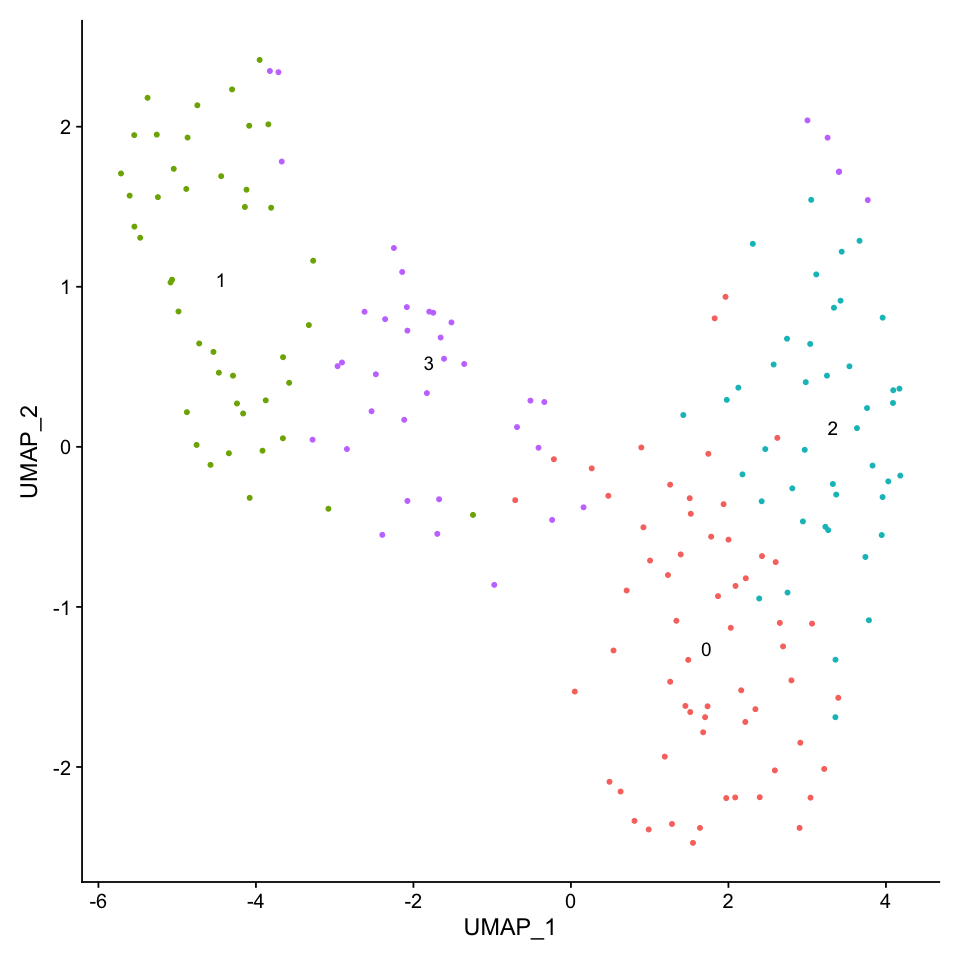

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
seu.post <- FindClusters(seu.post, resolution = 1.2)
DimPlot(seu.post, reduction = 'umap', label = T) + NoLegend()

In [9]:
levels(seu.post) <- c(1,3,2,0)
all.markers <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

Calculating cluster 1

Calculating cluster 3

Calculating cluster 2

Calculating cluster 0



[1] 559

[1] 40

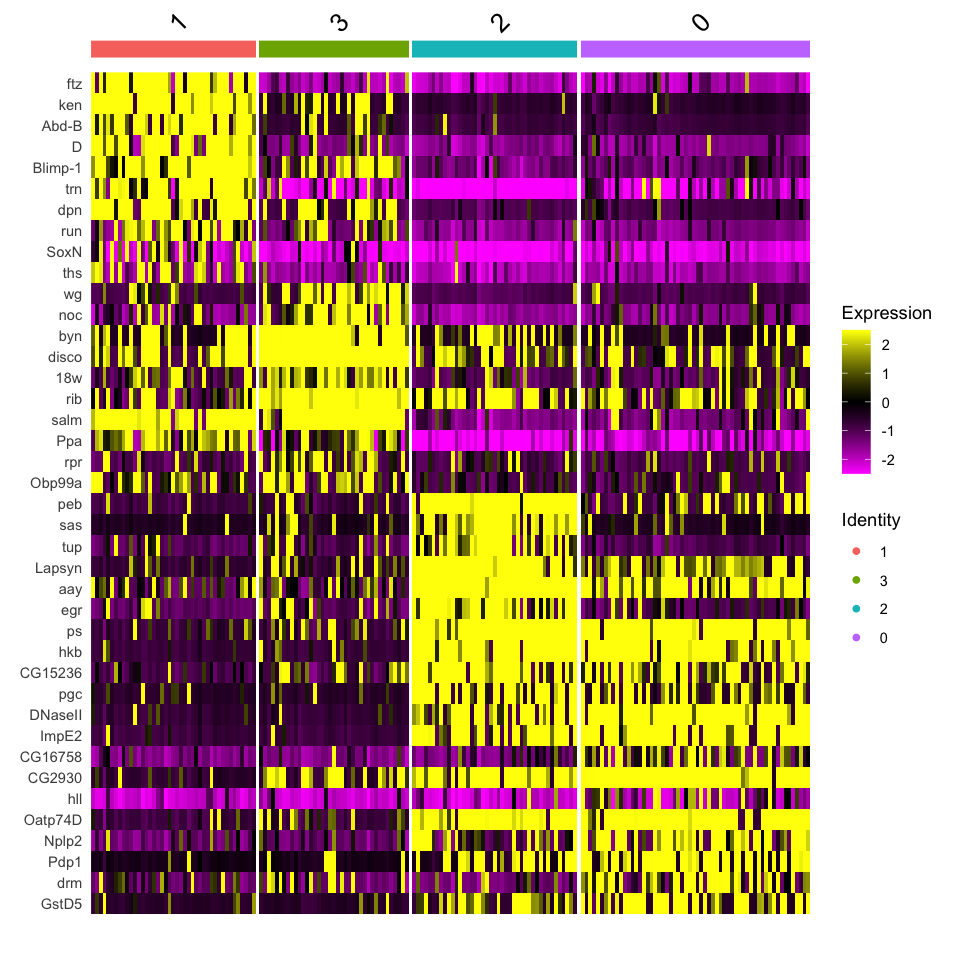

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
DoHeatmap(seu.post, features = c(all.markers.top10$gene))

## Add annotation

,manual_ID
,<fct>
GSM2494786_AGTTCGTGCTGG,0
GSM2494786_CATCTTACCTGC,2
GSM2494786_CACACGCAATAG,1
GSM2494786_TGCAAATCCGTC,1
GSM2494786_TGACAACCTGCA,2
GSM2494786_TTGAGAGGATGA,2


,manual_ID
,<fct>
GSM2494786_AGTTCGTGCTGG,endoderm_postMG_ventral
GSM2494786_CATCTTACCTGC,endoderm_postMG_dorsal
GSM2494786_CACACGCAATAG,ectoderm_PS14
GSM2494786_TGCAAATCCGTC,ectoderm_PS14
GSM2494786_TGACAACCTGCA,endoderm_postMG_dorsal
GSM2494786_TTGAGAGGATGA,endoderm_postMG_dorsal


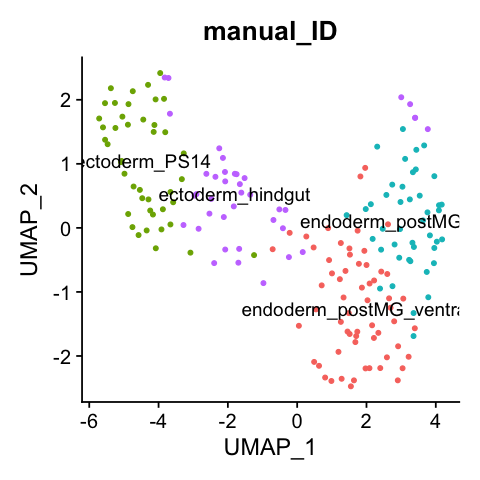

In [11]:
manual_id <- as.data.frame(seu.post$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)
manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                "0" = "endoderm_postMG_ventral", # hkb+, tup-
                                "1" = "ectoderm_PS14", #Abd-B+
                                "2" = "endoderm_postMG_dorsal", # hkb+, tup+
                                "3" = "ectoderm_hindgut" #byn+, Abd-B-
                                )
head(manual_id)
seu.post$manual_ID <- manual_id
options(repr.plot.width=4, repr.plot.height=4)
DimPlot(seu.post, reduction = 'umap', label = T, group.by = 'manual_ID') + NoLegend() 

In [12]:
Idents(seu.post) <- 'manual_ID'
levels(seu.post) <- c('ectoderm_PS14','ectoderm_hindgut','endoderm_postMG_ventral','endoderm_postMG_dorsal')
all.markers <- FindAllMarkers(object = seu.post, only.pos = TRUE)
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

Calculating cluster ectoderm_PS14

Calculating cluster ectoderm_hindgut

Calculating cluster endoderm_postMG_ventral

Calculating cluster endoderm_postMG_dorsal



[1] 559

[1] 40

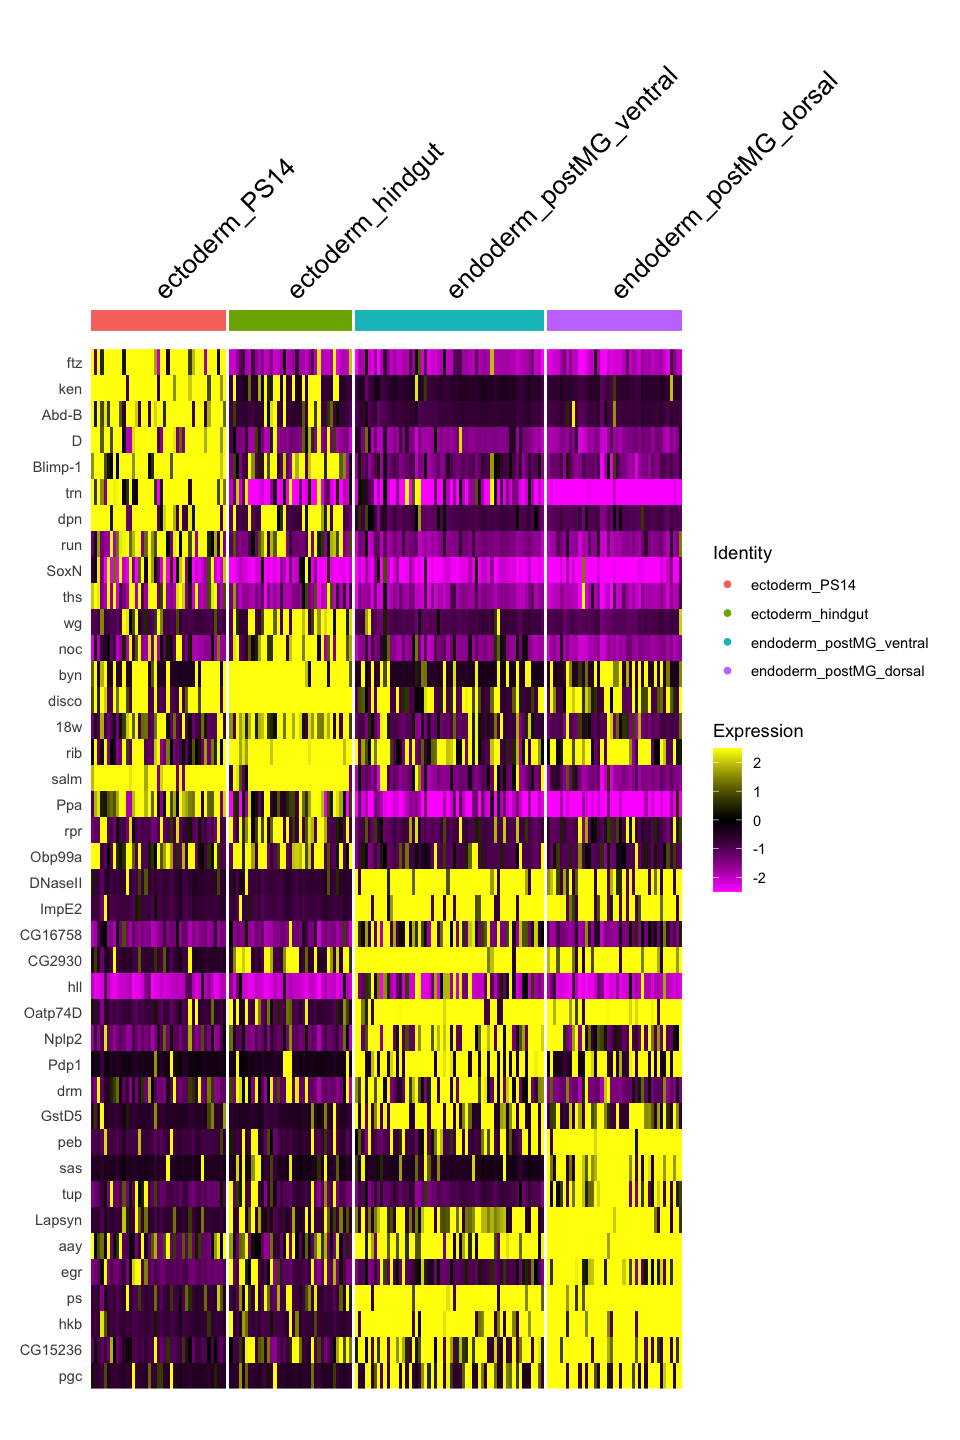

In [13]:
options(repr.plot.width=8, repr.plot.height=12)
DoHeatmap(seu.post, features = c(all.markers.top10$gene))

Saving 7 x 7 in image



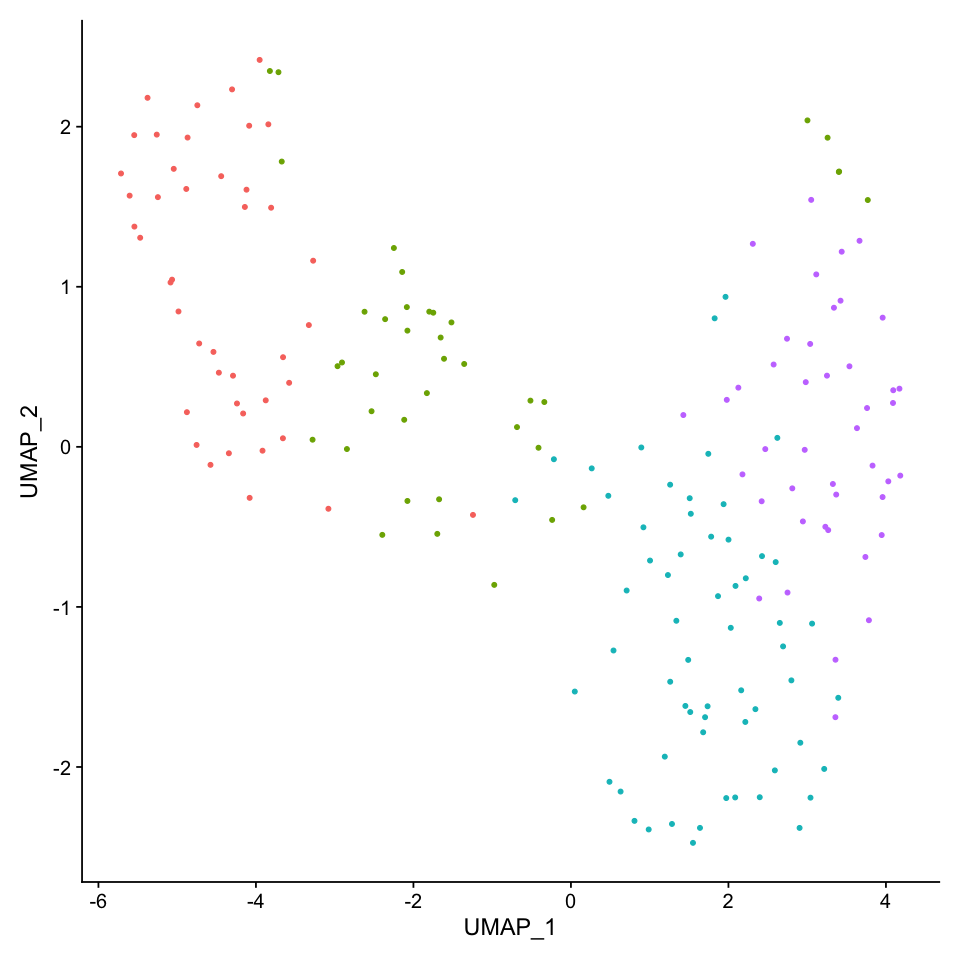

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.post, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/05_post_endo_subclustering_NK/post_umap1.eps", dpi = 300)

Saving 7 x 7 in image



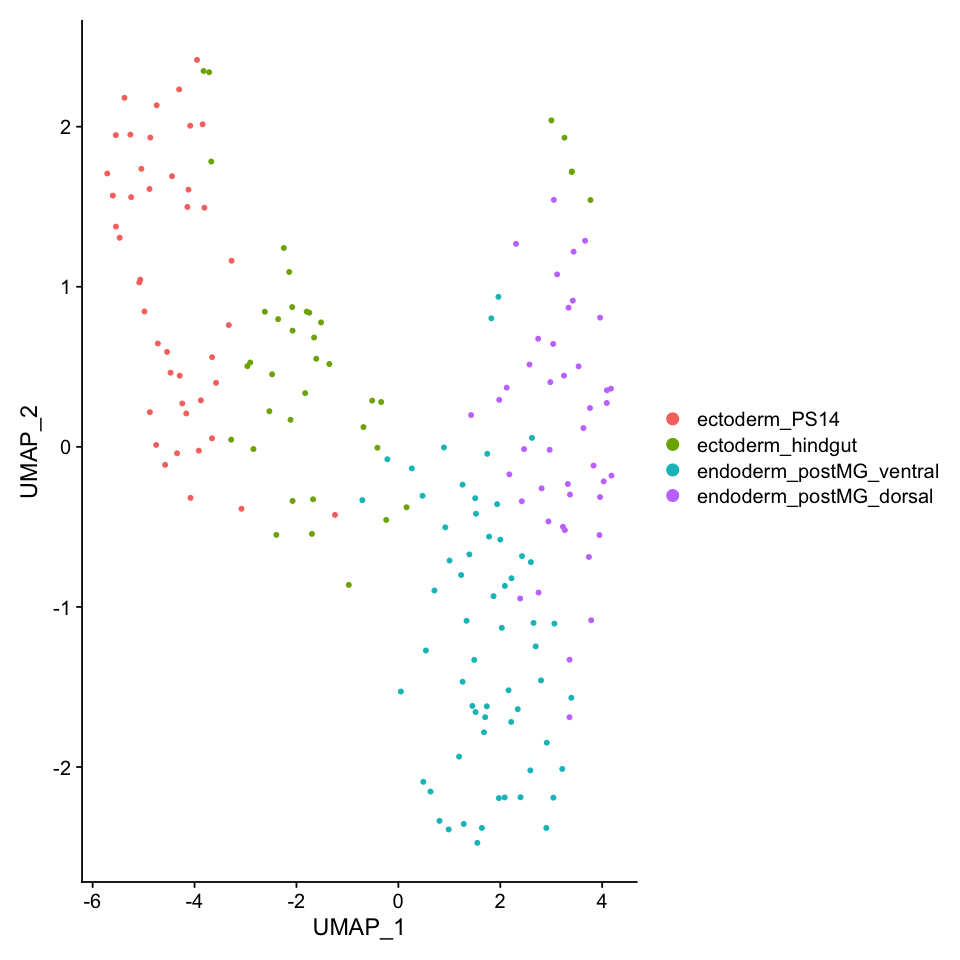

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu.post, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/05_post_endo_subclustering_NK/post_umap2.eps", dpi = 300)

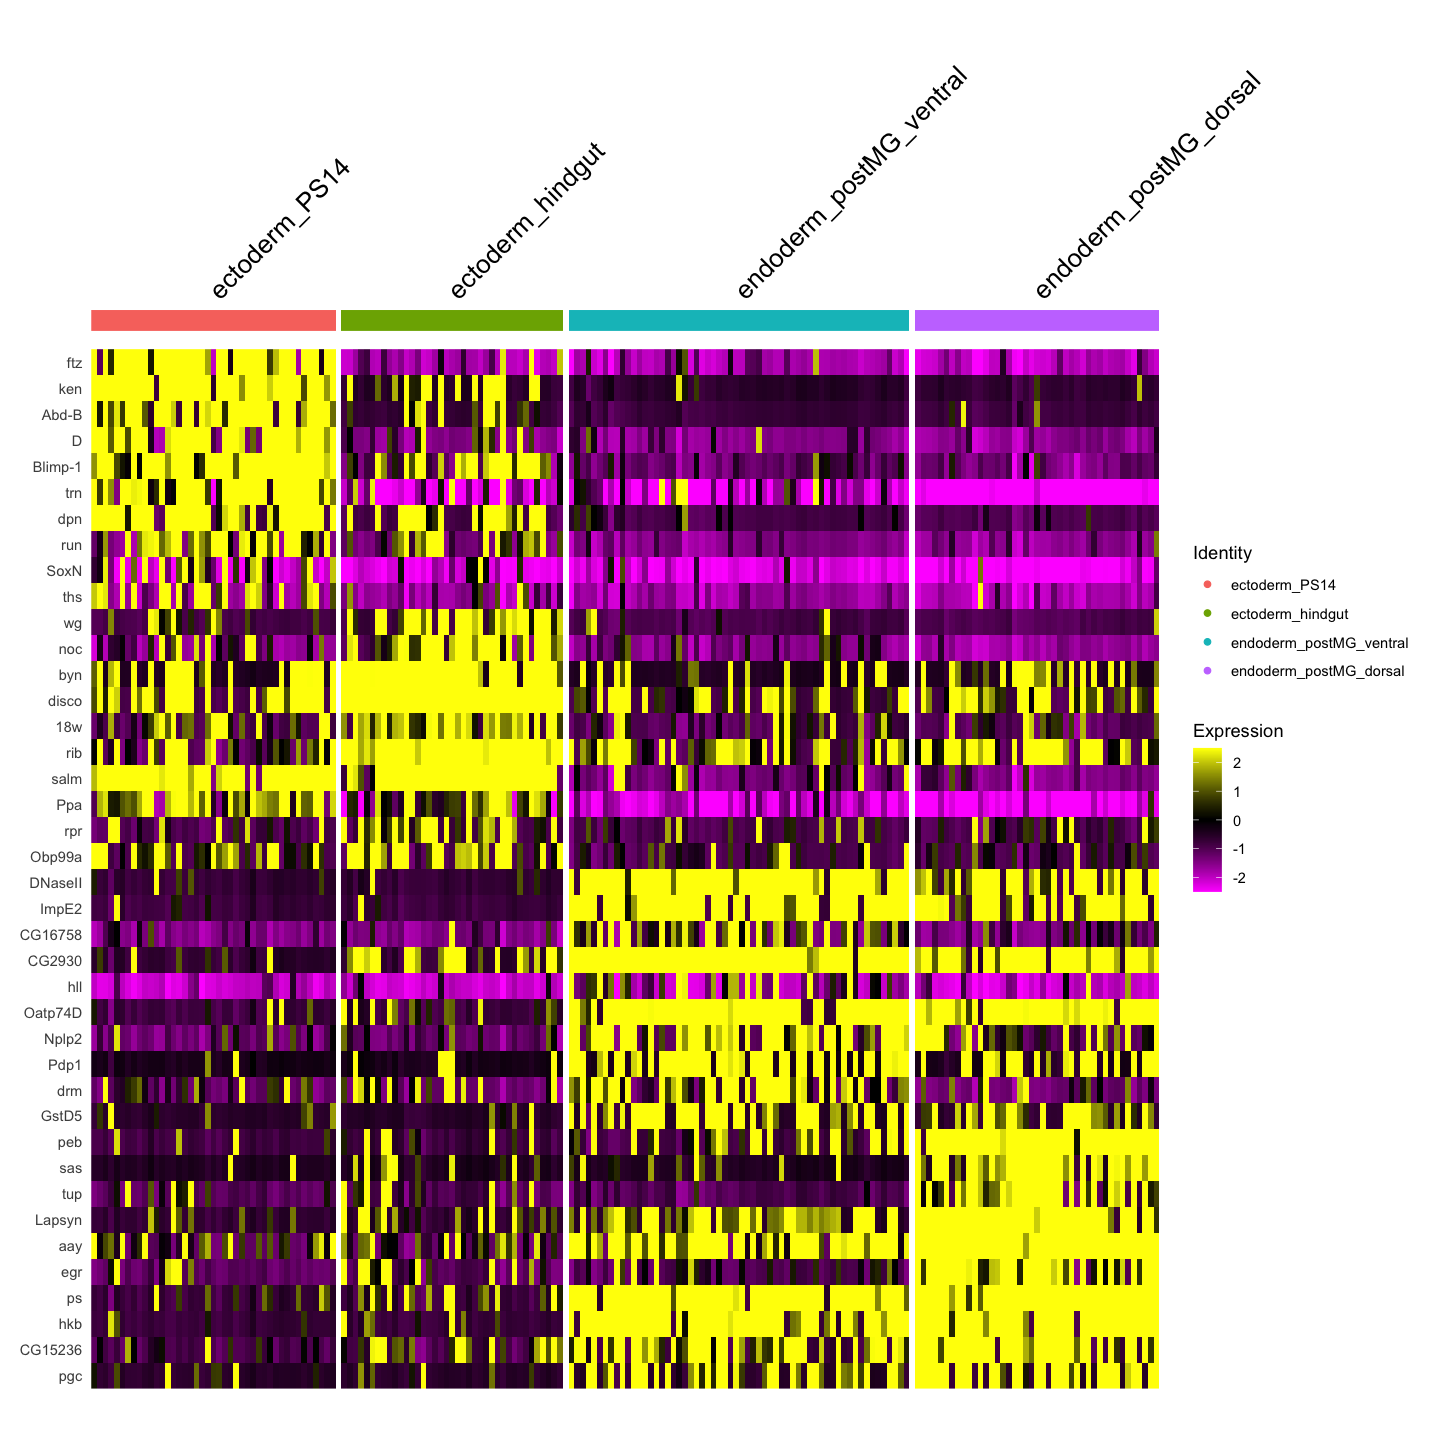

In [16]:
options(repr.plot.width=12, repr.plot.height=12)
fig <- DoHeatmap(seu.post, features = c(all.markers.top10$gene))
fig
ggsave(fig, file = "./figures/05_post_endo_subclustering_NK/post_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

In [17]:
saveRDS(object = seu.post, file = '../../data/seurat_object/NK-data/subclustering/seu_posterior_subclustering_NK.obj')

In [18]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv